**<h1> 1.  Load Data </h1>**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Mendefinisikan data path
path_data = '/content/drive/My Drive/Kuliah/dataset/'

In [3]:
# Membaca directory
import os
os.listdir(path_data)

['diabetes.csv',
 'heart.csv',
 'free_advertising_data.csv',
 'TestMatches_Dataset.csv',
 'sales.csv',
 'passenger.csv',
 'Data clean.csv',
 'passenger.gsheet',
 'retail_dataset3.csv',
 'data_retail.csv',
 'stroke.csv',
 'loan_prediction.csv']

In [4]:
# Import Packages
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

**<h2> Step 1</h2>**


Implementasi handling outlier multivariat

In [5]:
# load dataset
df_data = pd.read_csv(path_data+'free_advertising_data.csv')
df_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         197 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  197 non-null    float64
 3   Sales      197 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
df = df_data[['Radio','Sales']]
df = df.to_numpy()

**<h2> Step 2</h2>**


Menghitung dengan jarak mahalanobis

In [8]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [9]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([  5, 172]),)
--- Observasi terdeteksi sebagai outlier -----
[[48.9  7.2]
 [48.9 27. ]]


**<h2> Step 3</h2>**


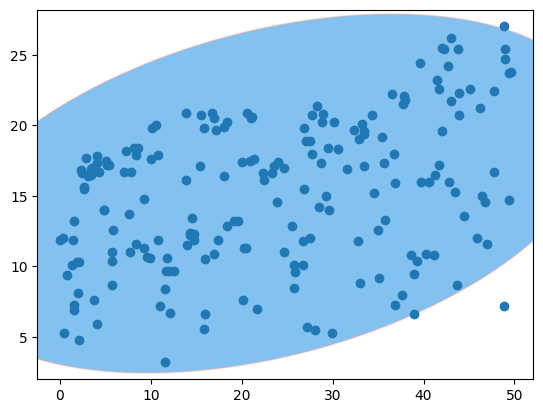

In [10]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Perhatian: Jika Titik Biru masih ada diluar lingkaran elips maka
lakukan Step 4 dan Step 5 !!!

**<h2> Step 4 (penyelesaian masalah)</h2>**


Handling Multivariate outlier

In [11]:
remove_outlier=df[distances <= cutoff,:]

In [12]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  197
Banyaknya data setelah menghapus outlier:  195


In [13]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [14]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([123]),)
--- Observasi terdeteksi sebagai outlier -----
[[38.9  6.6]]


**<h2>Step 5 (cek kembali elips)</h2>**


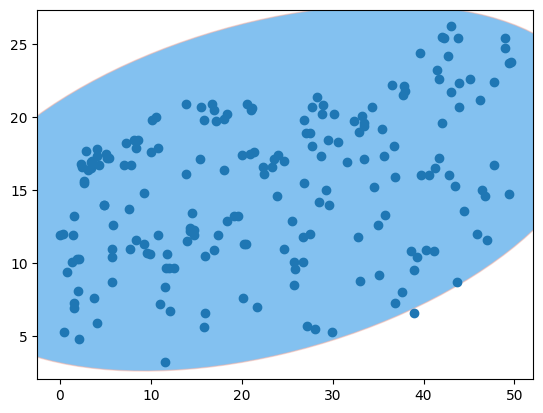

In [15]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Masih ada outlier, kemudian dilakukan handling multivariate outlier lagi yang kedua.

#### Setelah handling multivariate outlier kedua

In [26]:
remove_outlier=df[distances <= cutoff,:]

In [27]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  193
Banyaknya data setelah menghapus outlier:  193


In [28]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [29]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([], dtype=int64),)
--- Observasi terdeteksi sebagai outlier -----
[]


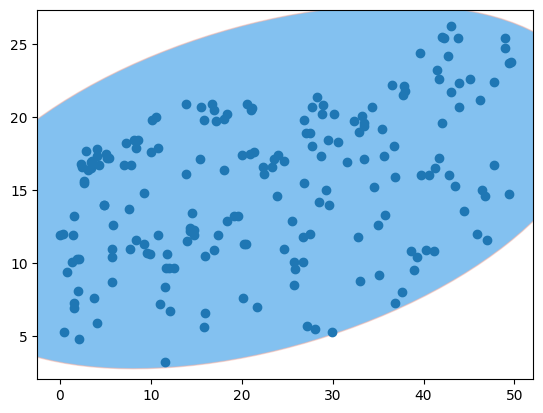

In [30]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()